In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import re
import string


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# from sklearn.datasets import fetch_20newsgroups

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/MarkChau_1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/MarkChau_1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/MarkChau_1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
with open('/Users/MarkChau_1/Desktop/_HKU_Academics/MStat/2023-24 Year2/(Y2S2) STAT8021/Project/N24News/news/nytimes.json', 'r') as file:
    df = json.load(file)

df = pd.DataFrame(df)

df.head()

,section,headline,article_url,article,abstract,article_id,image,caption,image_id
0,Health,F.D.A. Plans to Ban Most E-Cigarette Flavors b...,https://www.nytimes.com/2019/12/31/health/e-ci...,The Trump administration is expected to announ...,The tobacco and vaping industries and conserva...,42d25485-0e48-50bf-8d16-948833b2a55d,https://static01.nyt.com/images/2019/11/06/sci...,A new study by the National Institute on Drug ...,42d25485-0e48-50bf-8d16-948833b2a55d
1,Science,Meteor Showers in 2020 That Will Light Up Nigh...,https://www.nytimes.com/2020/01/01/science/met...,All year long as Earth revolves around the sun...,"All year long, Earth passes through streams of...",04bc90f0-b20b-511c-b5bb-3ce13194163f,https://static01.nyt.com/images/2020/01/01/sci...,"Perseid meteors named as ""Orinoid"" streak acro...",04bc90f0-b20b-511c-b5bb-3ce13194163f
2,Science,"Rocket Launches, Trips to Mars and More 2020 S...",https://www.nytimes.com/2020/01/01/science/spa...,"If you follow space news and astronomy, the pa...",A year full of highs and lows in space just en...,bd8647b3-8ec6-50aa-95cf-2b81ed12d2dd,https://static01.nyt.com/images/2020/01/01/sci...,Spectators viewing the launch of a Soyuz rocke...,bd8647b3-8ec6-50aa-95cf-2b81ed12d2dd
3,Television,What's on TV Wednesday: A Linda Ronstadt Doc a...,https://www.nytimes.com/2020/01/01/arts/televi...,LINDA RONSTADT: THE SOUND OF MY VOICE (2019) 9...,"""Linda Ronstadt: The Sound of My Voice"" airs o...",e6c25b53-0416-5795-b0cf-e1243924dc79,https://static01.nyt.com/images/2020/01/01/art...,"Linda Ronstadt in ""Linda Ronstadt: The Sound o...",e6c25b53-0416-5795-b0cf-e1243924dc79
4,Travel,New Cruise Ships to Set Sail for Antarctica,https://www.nytimes.com/2020/01/01/travel/anta...,As the number of travelers cruising Antarctica...,Interested in the southernmost continent? Here...,98c3d182-95ce-5244-9b9e-008a3dee7354,https://static01.nyt.com/images/2020/01/05/tra...,"Antarctica21&rsquo;s expedition ship, Ocean No...",98c3d182-95ce-5244-9b9e-008a3dee7354


In [3]:
df['article'][0]

'The Trump administration is expected to announce this week that it will ban mint-, fruit- and dessert-flavored e-cigarette cartridges popular with teenagers, but allow menthol and tobacco flavors to remain on the market. Flavored liquid nicotine used in open tank systems can continue to be sold, according to two administration officials who have been briefed on the plan. It is an important concession to vape shops that have thrived alongside the booming e-cigarette business in recent years. President Trump acknowledged late Tuesday that the ban would be announced "very shortly." But he indicated that it might be short-lived and he didn\'t say which flavors were involved.\n\nThe administration\'s decision is a partial retreat from a commitment it made in September to quickly devise a ban of all flavors except those that tasted like tobacco. Its plan to exempt menthol appeared to be an effort to dodge a bruising legal battle with the tobacco industry, and also reflected intense lobbying

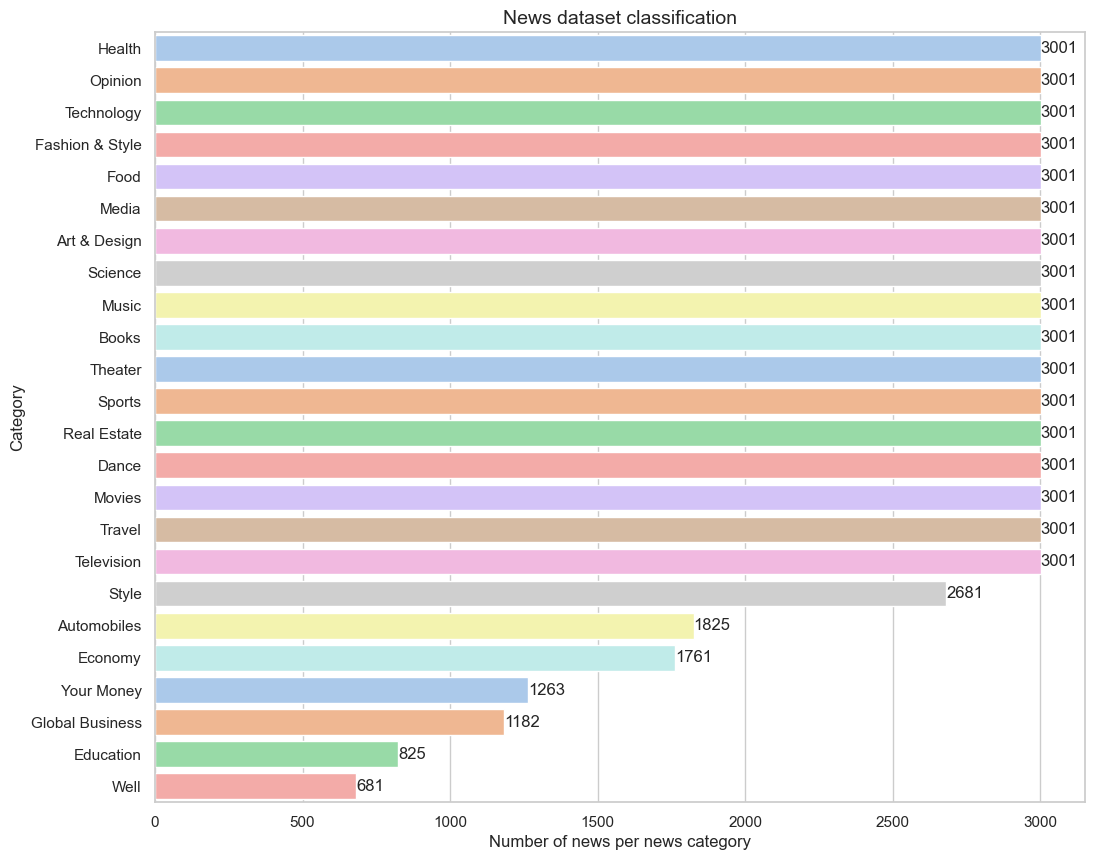

In [4]:
# Calculate the frequency counts of each category
category_counts = df['section'].value_counts()

colors = sns.color_palette('pastel', len(category_counts))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
ax = sns.barplot(x=category_counts.values, y=category_counts.index, orient='h', palette=colors)

# Add labels to each bar
for i, count in enumerate(category_counts.values):
    ax.text(count, i, str(count), ha='left', va='center')

plt.xlabel('Number of news per news category')
plt.ylabel('Category')
plt.title('News dataset classification', fontsize = 14)

plt.show()

In [5]:
df = df.drop(['headline', 'article_url', 'abstract', 'article_id', 'image','caption', 'image_id'], axis=1)
df.dropna(inplace=True) # drop the rows with empty values
df.head()

,section,article
0,Health,The Trump administration is expected to announ...
1,Science,All year long as Earth revolves around the sun...
2,Science,"If you follow space news and astronomy, the pa..."
3,Television,LINDA RONSTADT: THE SOUND OF MY VOICE (2019) 9...
4,Travel,As the number of travelers cruising Antarctica...


In [6]:
# transform words to lower case
df['article'] = df.article.map(lambda x: x.lower().translate(str.maketrans('','', string.punctuation)))

# initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# remove stop words and lemmatize words
def text_preprocessing(text):
    # Tokenize the text into individual words
    words = word_tokenize(text)
    
    # Remove stop words and apply lemmatization
    processed_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
    
    # Join the processed words back into a single string
    processed_text = ' '.join(processed_words)
    
    return processed_text

# Apply the processing function to the 'short_description' column
df['article_clean'] = df['article'].apply(text_preprocessing)

In [7]:
# convert sections into labels
label_encoder = LabelEncoder()
df['section_id'] = label_encoder.fit_transform(df['section'])
num_classes = len(label_encoder.classes_)

In [8]:
df.groupby('section')['section_id'].unique()

section
Art & Design        [0]
Automobiles         [1]
Books               [2]
Dance               [3]
Economy             [4]
Education           [5]
Fashion & Style     [6]
Food                [7]
Global Business     [8]
Health              [9]
Media              [10]
Movies             [11]
Music              [12]
Opinion            [13]
Real Estate        [14]
Science            [15]
Sports             [16]
Style              [17]
Technology         [18]
Television         [19]
Theater            [20]
Travel             [21]
Well               [22]
Your Money         [23]
Name: section_id, dtype: object

In [9]:
df.head()

,section,article,article_clean,section_id
0,Health,the trump administration is expected to announ...,trump administration expected announce week ba...,9
1,Science,all year long as earth revolves around the sun...,year long earth revolves around sun pass strea...,15
2,Science,if you follow space news and astronomy the pas...,follow space news astronomy past year offered ...,15
3,Television,linda ronstadt the sound of my voice 2019 9 pm...,linda ronstadt sound voice 2019 9 pm cnn going...,19
4,Travel,as the number of travelers cruising antarctica...,number traveler cruising antarctica swell pola...,21


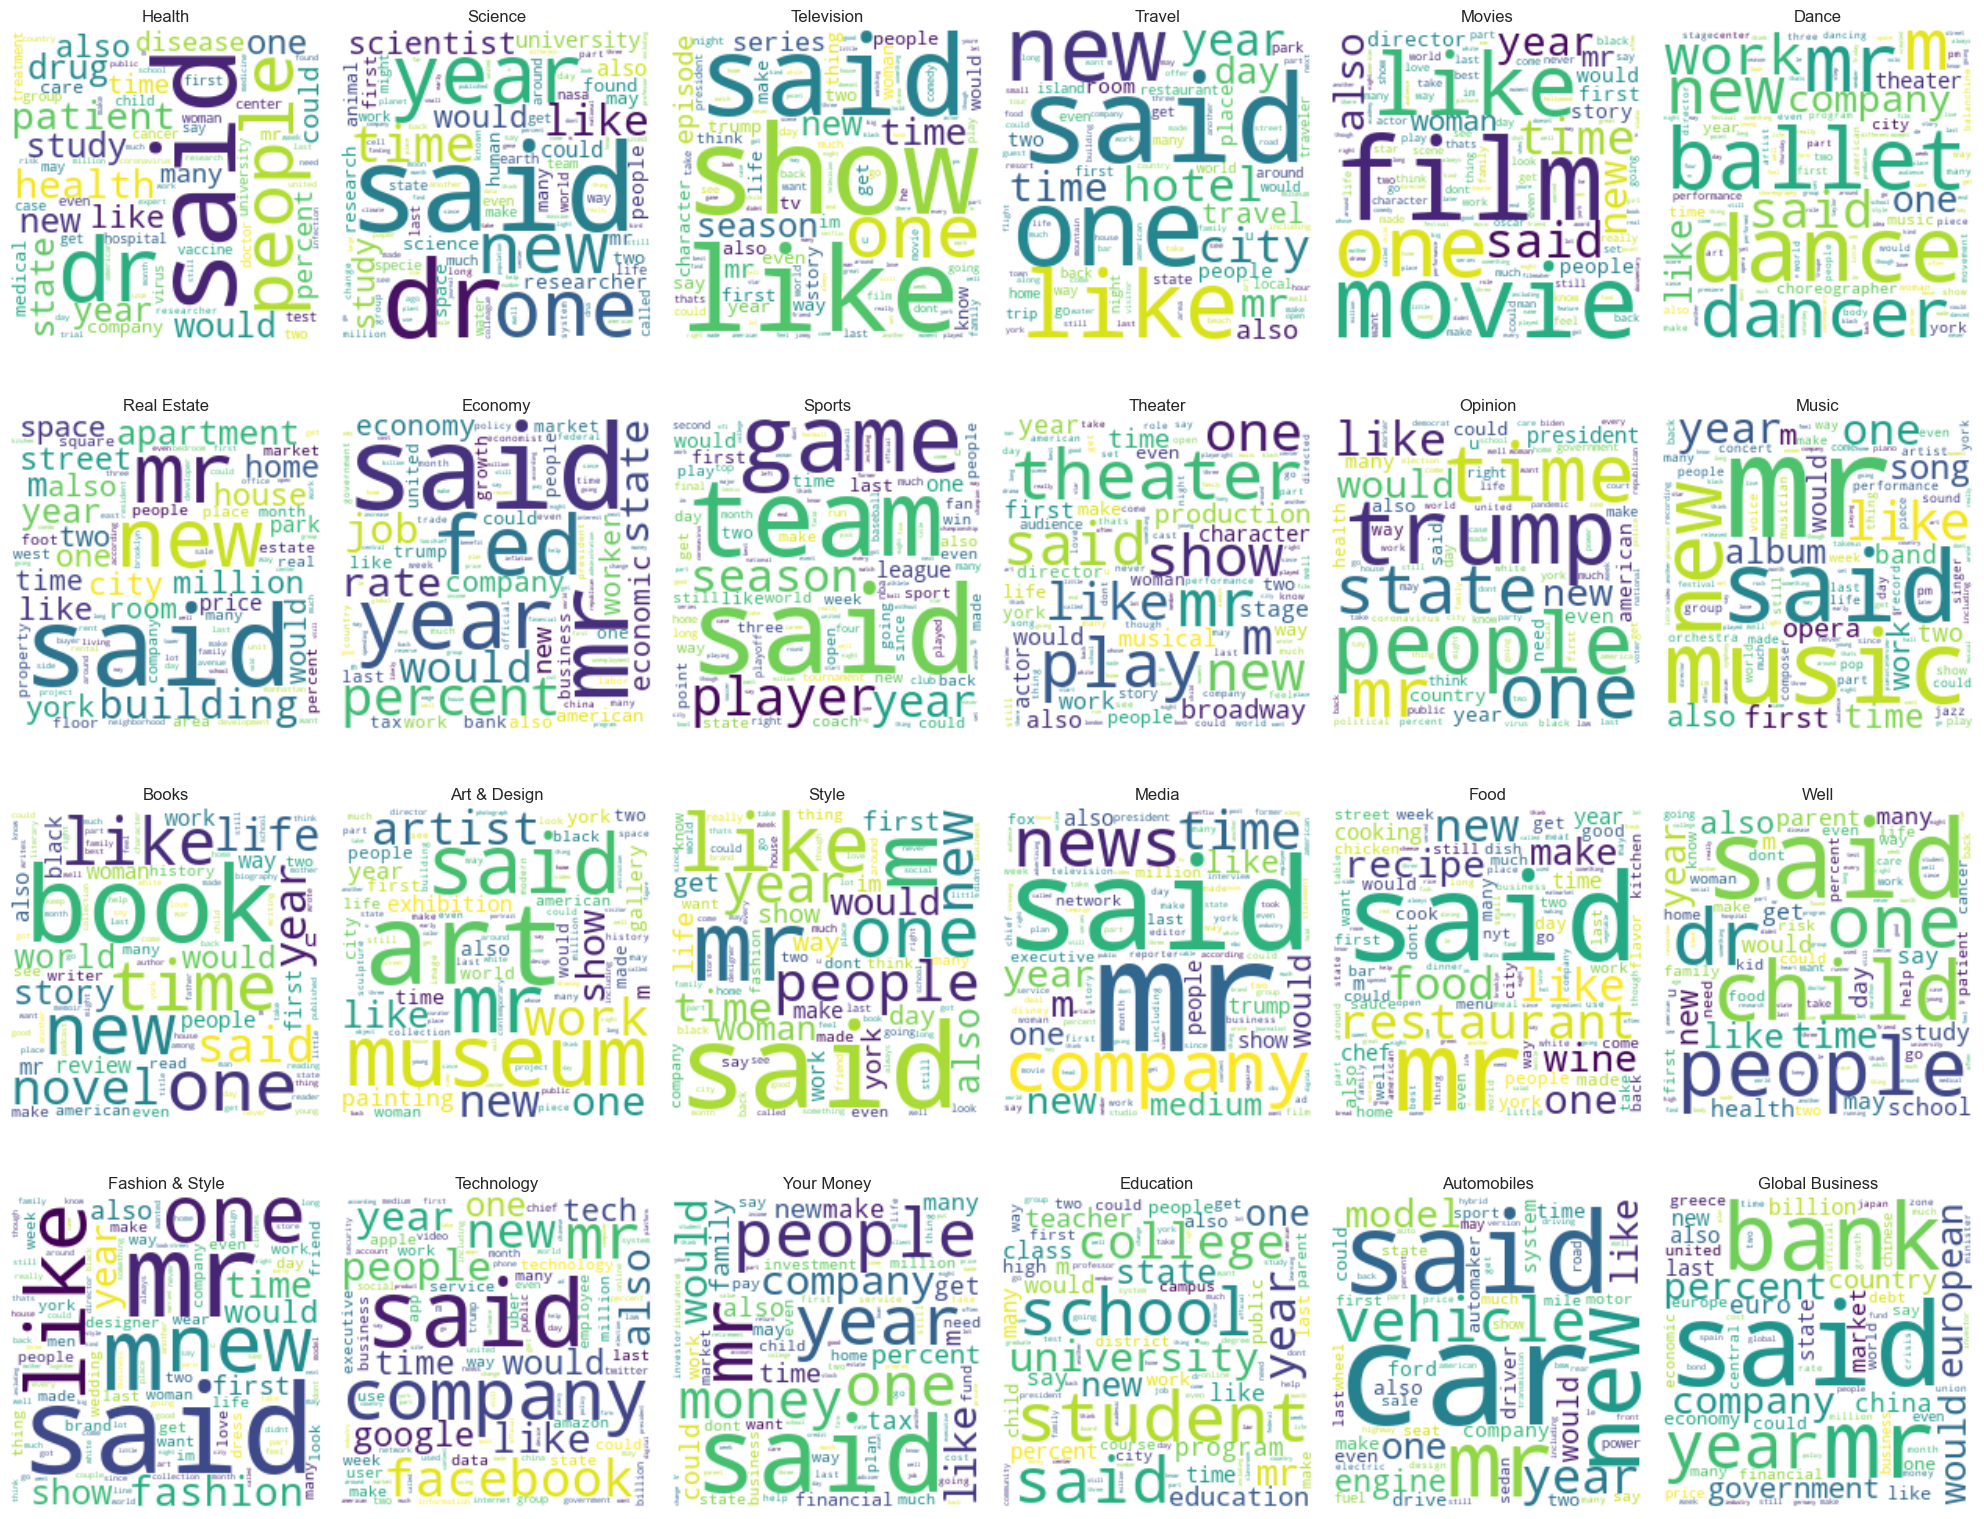

In [10]:
# word cloud for each category after transforming all words to lower case, removing stop words, and conducting lemmatization

word_frequencies = {}

# Iterate over each category
for category in df['section'].unique():
    # Filter the dataset for the current category
    section_df = df[df['section'] == category]
    
    # Combine all short descriptions for the current category
    combined_text = ' '.join(section_df['article_clean'])
    
    # Split the combined text into individual words
    words = combined_text.split()
    
    # Calculate word frequencies
    word_counts = {}
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1
    
    # Store the word frequencies for the current category
    word_frequencies[category] = word_counts

# Calculate the number of rows and columns for the subplots
num_categories = len(df['section'].unique())
num_rows = int(np.ceil(num_categories / 6))
num_cols = min(num_categories, 6)

# Generate word clouds for each category
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 16))

for i, (category, word_counts) in enumerate(word_frequencies.items()):
    # Calculate the position of the current category in the subplots
    row = i // num_cols
    col = i % num_cols
    
    # Create a WordCloud object with the word frequencies
    wordcloud = WordCloud(width=200, height=200, background_color='white').generate_from_frequencies(word_counts)
    
    # Plot the word cloud in the corresponding subplot
    axs[row, col].imshow(wordcloud, interpolation='bilinear')
    axs[row, col].set_title(f'{category}')
    axs[row, col].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
df['article_clean'],
df['section_id'],
random_state = 2024, test_size = 0.2)
print("Training dataset", X_train.shape)
print("Testing dataset", X_test.shape)

Training dataset (48988,)
Testing dataset (12247,)


In [12]:
count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

# Naive Bayes

In [13]:
# apply naive bayes classifier and generate predictions on the testing_data
# MNB: multinomial naive bayes
# CNB: complement naive bayes
MNB = MultinomialNB()
MNB.fit(training_data, y_train)
preds_MNB = MNB.predict(testing_data)

CNB = ComplementNB()
CNB.fit(training_data, y_train)
preds_CNB = CNB.predict(testing_data)

In [14]:
# evaluate model performance
def print_performance_metrics(classifier, training_data, testing_data, y_test):
    classifier.fit(training_data, y_train)
    preds = classifier.predict(testing_data)
    
    print(classifier.__class__.__name__, "Performance:")
    print("Accuracy score: ", accuracy_score(y_test, preds))
    print("Recall score: ", recall_score(y_test, preds, average='weighted'))
    print("Precision score: ", precision_score(y_test, preds, average="weighted"))
    print("F1 score: ", f1_score(y_test, preds, average="weighted"), "\n")

print_performance_metrics(MultinomialNB(), training_data, testing_data, y_test)
print_performance_metrics(ComplementNB(), training_data, testing_data, y_test)

MultinomialNB Performance:
Accuracy score:  0.8069731362782723
Recall score:  0.8069731362782723
Precision score:  0.8015229104442072
F1 score:  0.8006950629642052 



/Users/MarkChau_1/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ComplementNB Performance:
Accuracy score:  0.7949701967828856
Recall score:  0.7949701967828856
Precision score:  0.7971692404080017
F1 score:  0.7758835841919764 



# Logistic Regression

In [15]:
lr = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', LogisticRegression(max_iter = 500, multi_class="multinomial", penalty = 'l2')),
              ])

# Train the logistic regression model on the training set
lr.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 LogisticRegression(max_iter=500, multi_class='multinomial'))])

In [16]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [17]:
# Calculate the accuracy of the model
print(f"accuracy_score is: {accuracy_score(y_pred,y_test)}")
print(f"precision_score is: {precision_score(y_pred,y_test, average = 'weighted')}")
print(f"recall_score is: {recall_score(y_pred,y_test, average = 'weighted')}")
print(f"f1_score is: {f1_score(y_pred,y_test, average = 'weighted')}")

accuracy_score is: 0.8568629052012737
precision_score is: 0.8652701612446808
recall_score is: 0.8568629052012737
f1_score is: 0.8599682565523352


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       619
           1       0.94      0.96      0.95       353
           2       0.89      0.89      0.89       664
           3       0.98      0.96      0.97       583
           4       0.91      0.83      0.87       361
           5       0.77      0.77      0.77       138
           6       0.71      0.70      0.70       595
           7       0.87      0.94      0.90       617
           8       0.85      0.82      0.83       228
           9       0.82      0.86      0.84       613
          10       0.83      0.86      0.85       594
          11       0.85      0.88      0.86       604
          12       0.88      0.94      0.91       580
          13       0.83      0.87      0.85       571
          14       0.90      0.92      0.91       558
          15       0.85      0.90      0.87       613
          16       0.92      0.97      0.94       594
          17       0.57    

In [19]:
# testing the model with different texts

news = ["The National Basketball Association plans to expand into 32 teams.",
       "Google Stock Loses $57 Billion Amid Microsoft's AI 'Lead'—And \
       Reports It Could Be Replaced By Bing On Some Smartphones",
       "Trousers with dress shirt usually are a good combination.",
       "Have you thought of studying astronomy and becoming a physicist?"]

predicted = lr.predict(news)

for doc, category in zip(news, predicted):
     print(category)

16
18
6
15


# Support Vector Classifier

In [20]:
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# # Initialize the SVC model
# svc_model = SVC(kernel="rbf")

# # Train the model
# svc_model.fit(X_train_vec, y_train)

In [ ]:
# # Predictions on the test set
# y_pred = svc_model.predict(X_test_vec)

# # Evaluate metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average="weighted")
# recall = recall_score(y_test, y_pred, average="weighted")
# f1 = f1_score(y_test, y_pred, average="weighted")

# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")

# # Classification report
# print(classification_report(y_test, y_pred))

In [21]:
# multi-class SVM
multi_svc = SVC(kernel='linear', C=1, decision_function_shape='ovr')
multi_svc.fit(X_train_vec, y_train)

SVC(C=1, kernel='linear')

In [23]:
y_pred = multi_svc.predict(X_test_vec)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8288
Precision: 0.8260
Recall: 0.8288
F1 Score: 0.8262
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       619
           1       0.90      0.94      0.92       353
           2       0.86      0.88      0.87       664
           3       0.95      0.95      0.95       583
           4       0.85      0.79      0.82       361
           5       0.66      0.81      0.73       138
           6       0.67      0.70      0.68       595
           7       0.82      0.88      0.85       617
           8       0.80      0.82      0.81       228
           9       0.80      0.85      0.82       613
          10       0.79      0.80      0.80       594
          11       0.82      0.82      0.82       604
          12       0.85      0.90      0.87       580
          13       0.82      0.85      0.84       571
          14       0.90      0.90      0.90       558
          15       0.85      0.86      0.86       613
          16  

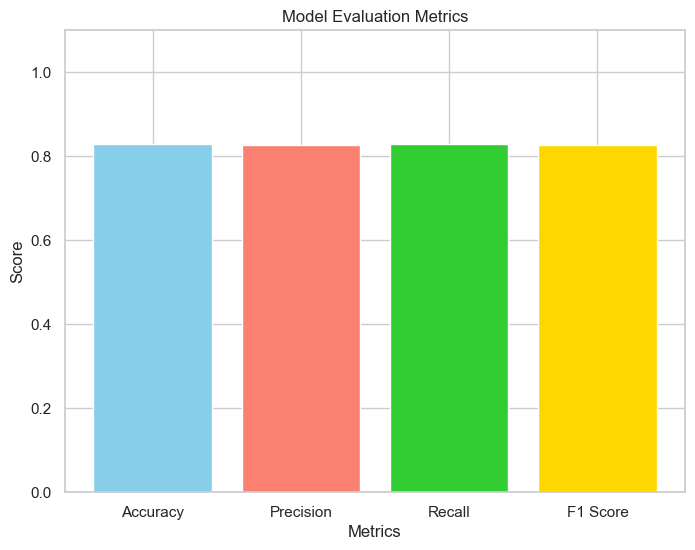

In [24]:
# create a bar chart for accuracy, precision, recall, and F1 score of SVC
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=["skyblue", "salmon", "limegreen", "gold"])
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Model Evaluation Metrics")
plt.ylim(0, 1.1)
plt.show()